In [1]:
############################
## Automatic Model Parser ##
############################
#### By Micah Ketola 19 ####
############################

import numpy as np
import copy  as copy
import matplotlib.pyplot as plt

isAltmann = 0

if isAltmann:
    # Altmann stuff
    modelName = "Stroop-Model-Altmann.txt"
    logFile   = "./traceData/altmann_Console_mod.txt"

    startKey  = "view-stim"
    endKey    = "manual-output"
else:
    # Lovett stuff
    modelName = "Stroop-Model-Lovett-wNeutral.txt"
    logFile   = "./traceData/lovett_neu_Console_mod.txt"

    startKey  = "view-stim"
    endKey    = "manual-answer"


In [2]:
## Set-up
bufferNames = ["visual","goal","retrieval","imaginal","manual"]
file = open(modelName,"r")

lines = file.readlines()
productionNames = list()
record = 0
for line in lines:
    #print(line)
    words = line.split()
    # check if start of production
    if len(words):
        if words[0] == "(p":
            # Get names of productions
            productionNames.append(words[1])
            
print(productionNames)
print(len(productionNames))

['view-stim', 'encode-word-concept', 'encode-color-concept', 'reselect-to-color', 'reselect-to-word', 'retrieve-word-answer', 'retrieve-color-answer', 'reselect-no-answer', 'manual-answer']
9


In [3]:
def chunkTransferCheck(bufferIndex, queryIndex, productionHalf, lineIndex):
    global bufferContents
    startI = copy.deepcopy(lineIndex)
    lineIndex += 1
    line  = lines[lineIndex]
    words = line.split()
    firstWord = words[0]
    while not firstWord == ")" and not firstWord.endswith(">") and firstWord[0]:
        line  = lines[lineIndex]
        words = line.split()
        if len(words):
            firstWord = words[0]
            if len(words) > 1:
                bufferContents[productionHalf][bufferIndex].append(words[1]) 
                queryContents[productionHalf][bufferIndex].append(queryIndex)
        lineIndex += 1
    if lineIndex - startI > 1:
        return lineIndex - startI - 1
    else:
        return lineIndex - startI 

connectivityMat   = np.zeros((len(productionNames),5,5))

####################
# VALUES TO CHANGE #
####################

queryValues = ["?", "=", "+", "*", "@"]
queryMult   = [.5,  .5,   1,   1,   1]

global bufferContents
bufferContents = [[[] for i in range(5)], [[] for i in range(5)]]
global queryContents
queryContents  = [[[] for i in range(5)], [[] for i in range(5)]]
count = -1
i = -1
while i < len(lines) - 1:
    i += 1
    line  = lines[i]
    words = line.split()
    if len(words):
        firstWord = words[0]
        # check if start of production
        if firstWord == "(p":
            #print(words)
            i += 1
            count += 1
            productionHalf = 0
            currentProduction = productionNames[count]
            print(productionNames[count])
            bufferContents = [[[] for i in range(5)], [[] for i in range(5)]]
            queryContents  = [[[] for i in range(5)], [[] for i in range(5)]]
            while not firstWord == ")":
                line  = lines[i]
                words = line.split()
                if len(words):
                    firstWord = words[0]
                
                    # log production checks
                    # if first character queries a buffer then...
                    if firstWord[0] in queryValues and not firstWord[1] == "=":         
                        queryIndex = queryValues.index(firstWord[0])
                        currentBufferIndex = bufferNames.index(firstWord[1:-1]) if firstWord[1:-1] in bufferNames else -1
                        if currentBufferIndex > -1:
                            dash = chunkTransferCheck(currentBufferIndex,queryIndex,productionHalf,i)
                            i += dash
                            if queryIndex < 2:                            
                                print("Check: "  + firstWord[1:-1]) 
                            else:
                                print("Modify: " + firstWord[1:-1])
                        else:
                            #print("Buffer name is not included in matrix")
                            i += 1
                    elif firstWord == "==>":
                        # now second half
                        productionHalf = 1
                        print("Second half")
                        i += 1
                    else:
                        i += 1    
                else:
                    i += 1
                    
            for a in range(0,5):
                for b in range(0,len(bufferContents[0][a])):                 
                    for c in range(0,5):
                        contentsAreEqual = bufferContents[1][c].index(bufferContents[0][a][b]) if bufferContents[0][a][b] in bufferContents[1][c] else -1                     
                        if contentsAreEqual > -1:
                            # chunk transfer between buffers = queryMult[queryContents]
                            connectivityMat[count][c][a] += queryMult[queryContents[1][c][contentsAreEqual]]
            print()
            print("Buffer Contents:")
            print(bufferContents[0])
            print(bufferContents[1])
            print()
            print(connectivityMat[count][:][:])
            print()

view-stim
Check: visual
Check: goal
Check: imaginal
Check: manual
Second half
Modify: imaginal
Modify: goal

Buffer Contents:
[['free'], ['empty'], [], ['free'], ['free', 'free', 'free']]
[[], ['phase', 'encode', 'nil', 'color'], [], ['nil', 'nil'], []]

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

encode-word-concept
Check: visual
Check: imaginal
Check: visual
Check: retrieval
Check: goal
Second half
Check: imaginal
Modify: retrieval
Modify: goal
Check: visual

Buffer Contents:
[['stroop-stimulus', 'stimulus', '=WORD', 'free'], ['phase', 'encode'], ['free'], ['nil'], []]
[[], ['phase', 'check', 'word', 'color'], ['association', 'word', '=WORD'], ['=WORD'], []]

[[0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]

encode-color-concept
Check: visual
Check: imaginal
Check: visual
Check: retrieval
Check: goal
Second half
Check: imaginal
Modify: retrieval
Modify: goal
Check: visua

In [4]:
# takes in the output of model once ran in ACT-R
# logFile = "./traceData/lovett_Console_Neutral.txt"
trace      = open(logFile,"r")
modelTrace = trace.readlines()
prodCount  = [0 for  i in range(1, len(productionNames))]
prodTrace  = list()
prodTiming = list()
trialLog   = list()

for line in modelTrace:
    #print(line)
    words = line.split()
    # print(words)
    # check if start of production
    if len(words) >= 3:
        # Productions
        if words[2] == 'PRODUCTION-FIRED':
            # Get names of productions
            prodName  = words[3].lower()
            #print("text : " + prodName)
            curTiming = words[0]
            
            for prodNum in range(len(productionNames)):
                curProd = productionNames[prodNum-1]
                
                # compare output production to recorded productions, and update +1 if equal
                if prodName == curProd:
                    prodTrace.append(curProd)
                    prodTiming.append(curTiming)
                    #print("match: " + curProd)
                    prodCount[prodNum - 1] += 1
                elif prodNum == len(productionNames):
                    print("Couldn't find a match: " + prodName + " ahhhhhhhhhhhhhhhhhhhhhhhhh")
                    
        # Trial Types           
        elif words[0] == 'NEW':
            trialType = words[1]
            trialLog.append(trialType)
            
            
print(trialLog)    

['NEUTRAL', 'INCONGRUENT', 'INCONGRUENT', 'INCONGRUENT', 'INCONGRUENT', 'NEUTRAL', 'NEUTRAL', 'INCONGRUENT', 'NEUTRAL', 'NEUTRAL', 'CONGRUENT', 'INCONGRUENT', 'INCONGRUENT', 'NEUTRAL', 'INCONGRUENT', 'INCONGRUENT', 'CONGRUENT', 'NEUTRAL', 'INCONGRUENT', 'INCONGRUENT', 'INCONGRUENT', 'NEUTRAL', 'CONGRUENT', 'INCONGRUENT', 'NEUTRAL', 'CONGRUENT', 'INCONGRUENT', 'NEUTRAL', 'CONGRUENT', 'CONGRUENT', 'NEUTRAL', 'NEUTRAL', 'CONGRUENT', 'CONGRUENT', 'NEUTRAL', 'NEUTRAL', 'CONGRUENT', 'CONGRUENT', 'CONGRUENT', 'INCONGRUENT', 'NEUTRAL', 'CONGRUENT', 'INCONGRUENT', 'CONGRUENT', 'INCONGRUENT', 'CONGRUENT', 'NEUTRAL', 'INCONGRUENT', 'CONGRUENT', 'INCONGRUENT', 'NEUTRAL', 'CONGRUENT', 'CONGRUENT', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'CONGRUENT', 'CONGRUENT', 'INCONGRUENT', 'NEUTRAL', 'INCONGRUENT', 'NEUTRAL', 'INCONGRUENT', 'NEUTRAL', 'NEUTRAL', 'INCONGRUENT', 'CONGRUENT', 'NEUTRAL', 'INCONGRUENT', 'NEUTRAL', 'CONGRUENT', 'NEUTRAL', 'INCONGRUENT', 'INCONGRUENT', 'INCONGRUENT', 'INCONGRUENT'

In [5]:
# Specified at beginning of file:
# startKey  = "view-stim"
# endKey    = "manual-answer"

#print(prodTrace)

sequenceRun    = ""
allSequences   = []
sequenceTiming = []

for curProd in range(len(prodTrace)):
    if prodTrace[curProd] == startKey:
        sequenceRun = startKey + "/"
        trialStart  = prodTiming[curProd]
        
        #print("Start: " + str(trialStart))
    elif prodTrace[curProd] == endKey:
        sequenceRun += endKey
        allSequences.append(sequenceRun)
        sequenceRun = ""
        trialEnd    = prodTiming[curProd]
        
        #print("End: " + str(trialEnd))
        if (float(trialEnd) - float(trialStart)) < 0 or (float(trialEnd) - float(trialStart)) > 10:
            print()
            print("This is where it fucks up: curProd = " + str(curProd))
            print("Start time: " + str(trialStart))
            print("Stop  time: " + str(trialEnd))
            print(prodTrace[curProd] + " == " + endKey)
            print(prodTiming[curProd])
            print("Before: " + prodTrace[curProd-1])
            print()
        sequenceTiming.append((float(trialEnd) - float(trialStart)))
    else:
        sequenceRun += prodTrace[curProd] + "/"

#print(prodTiming)
#print(sequenceTiming)

In [6]:
uniqueSequences     = set(allSequences)
uniqueSequenceCount = [0 for i in range(len(uniqueSequences))]
count = -1

#print(set(allSequences))

for curUniqueSequence in uniqueSequences:
    count += 1
    for curAllSequence in allSequences:
        if curUniqueSequence == curAllSequence:
            uniqueSequenceCount[count] += 1
          
print(uniqueSequenceCount)

[93, 2, 19, 5]


view-stim/encode-word-concept/reselect-to-color/encode-color-concept/retrieve-color-answer/manual-answer

view-stim/encode-word-concept/retrieve-word-answer/manual-answer

view-stim/encode-color-concept/retrieve-color-answer/manual-answer

view-stim/encode-word-concept/retrieve-word-answer/reselect-no-answer/encode-color-concept/retrieve-color-answer/manual-answer



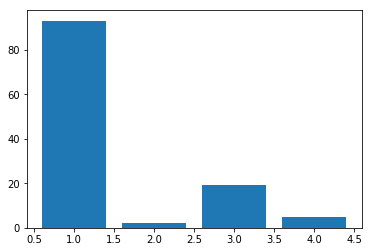

In [7]:
y_pos = np.arange(len(uniqueSequenceCount))

plt.bar(y_pos + 1, uniqueSequenceCount)

#plt.xticks(y_pos, uniqueSequences)

for i in uniqueSequences:
    print(i)
    print()

In [8]:
#plt.hist(sequenceTiming)
congruentTiming   = list()
neutralTiming     = list()
incongruentTiming = list()
aveCongruentTiming   = 0
aveNeutralTiming     = 0
aveIncongruentTiming = 0

for curTrial in range(len(sequenceTiming)-1):
    if trialLog[curTrial] == 'CONGRUENT':
        congruentTiming.append(sequenceTiming[curTrial])
    elif trialLog[curTrial] == 'INCONGRUENT':
        incongruentTiming.append(sequenceTiming[curTrial])
    else:
        neutralTiming.append(sequenceTiming[curTrial])
 
for i in congruentTiming:
    aveCongruentTiming += float(i)
aveCongruentTiming = aveCongruentTiming / len(congruentTiming)
#print("Congruent Trial Times: " + str(congruentTiming))
print("Average Congruent Trial Time: " + str(aveCongruentTiming))
#print()

for i in neutralTiming:
    aveNeutralTiming += float(i)
aveNeutralTiming = aveNeutralTiming / len(neutralTiming)
#print("Neutral Trial Times: " + str(neutralTiming))
print("Average Neutral Trial Time: " + str(aveNeutralTiming))

for i in incongruentTiming:
    aveIncongruentTiming += float(i)
aveIncongruentTiming = aveIncongruentTiming / len(incongruentTiming)
#print("Incongruent Trial Times: " + str(incongruentTiming))
print("Average Incongruent Trial Time: " + str(aveIncongruentTiming))
#print()

Average Congruent Trial Time: 1.1730487804878043
Average Neutral Trial Time: 1.3108536585365858
Average Incongruent Trial Time: 1.1755555555555561


(array([ 7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 29.]),
 array([1.095, 1.105, 1.115, 1.125, 1.135, 1.145, 1.155, 1.165, 1.175,
        1.185, 1.195]),
 <a list of 10 Patch objects>)

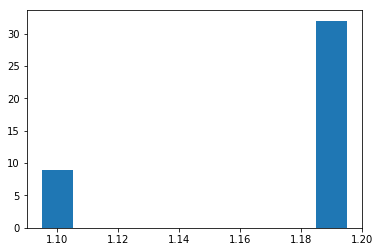

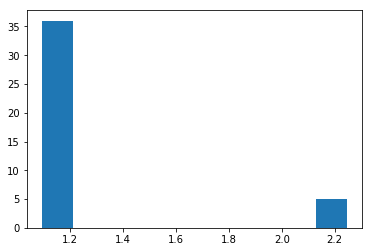

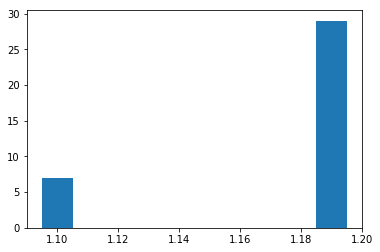

In [9]:
plt.figure()
plt.hist(congruentTiming)
plt.figure()
plt.hist(neutralTiming)
plt.figure()
plt.hist(incongruentTiming)
